In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
print("Categories in gender : ",df['gender'].unique())
print("Categories in race : ",df['race_ethnicity'].unique())
print("Categories in parent education : ",df['parental_level_of_education'].unique())
print("Categories in lunch : ",df['lunch'].unique())
print("Categories in test preparation : ",df['test_preparation_course'].unique())




Categories in gender :  ['female' 'male']
Categories in race :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parent education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch :  ['standard' 'free/reduced']
Categories in test preparation :  ['none' 'completed']


In [16]:
numerical_feature = [i for i in df.columns if df[i].dtype != 'O']
print("Numerical Features : ",numerical_feature)
categorial_feature = [i for i in df.columns if df[i].dtype == 'O' ]
print("Categorial Feature : ",categorial_feature)

Numerical Features :  ['math_score', 'reading_score', 'writing_score']
Categorial Feature :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=round(df['total_score']/3,2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [24]:
print(f"No.of students with full marks in reading = {df[df['reading_score']==100]['reading_score'].count()}")
print(f"No.of students with full marks in writing = {df[df['writing_score']==100]['writing_score'].count()}")
print(f"No.of students with full marks in math = {df[df['math_score']==100]['math_score'].count()}")

No.of students with full marks in reading = 17
No.of students with full marks in writing = 14
No.of students with full marks in math = 7


<Axes: xlabel='average_score', ylabel='Count'>

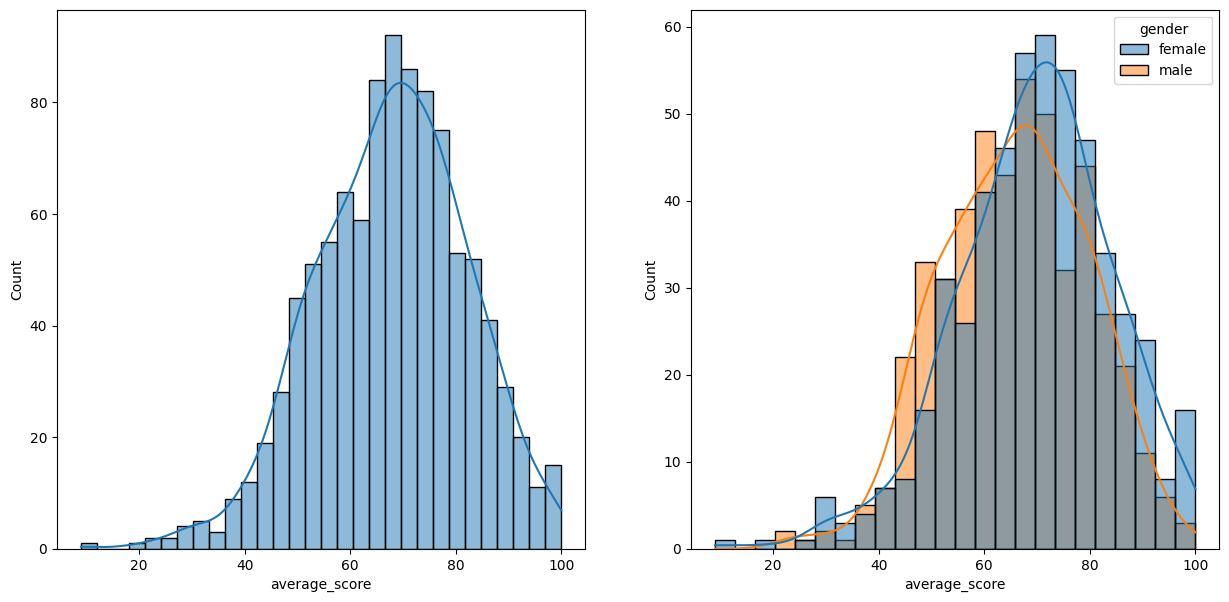

In [28]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='average_score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(df,x='average_score',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

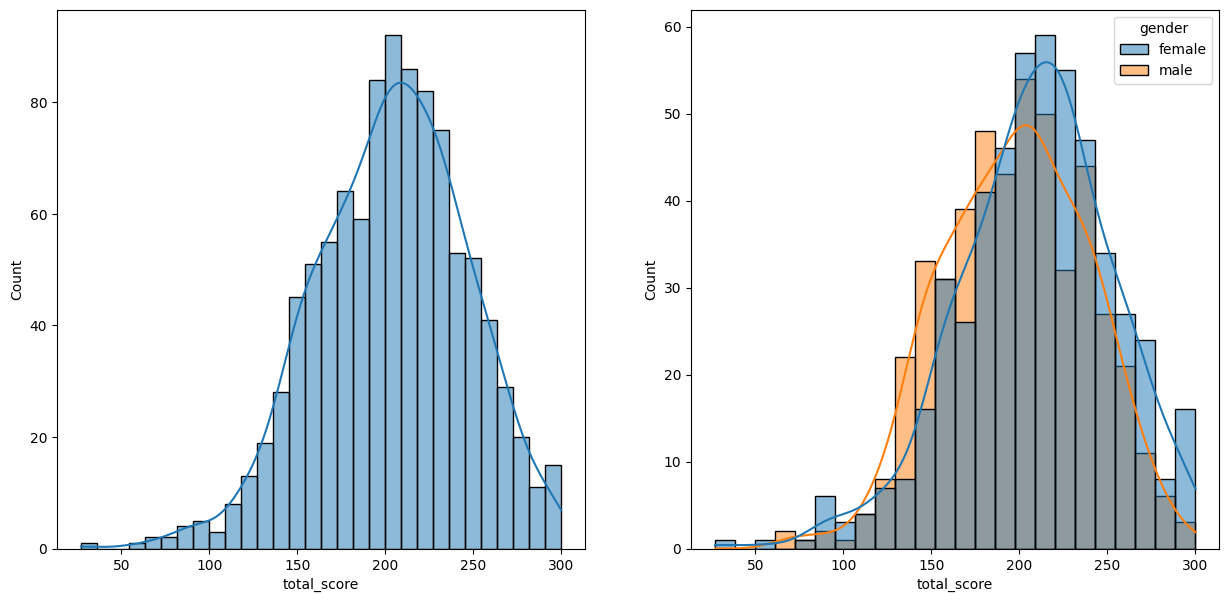

In [29]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='total_score',bins=30,kde=True)
plt.subplot(122)
sns.histplot(df,x='total_score',kde=True,hue='gender')

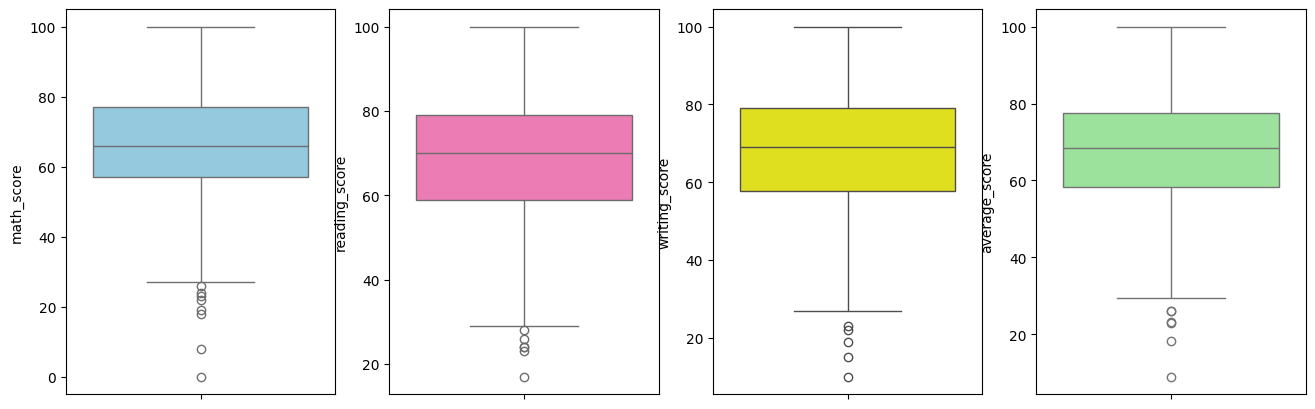

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()